# **Project UAS: Analisis Data Eksplorasi**
##**Kelompok 1**

| NIM | Nama | Deskripsi Kontribusi | Kontribusi(%) |
| -------- | -------- | -------- | -------- |
|11220940000006   | Ahmad Izza   | perumusan masalah, diskusi grup, coding, pre-processing, penulisan laporan, review kelompok lain  | 100%   |
|11220940000008   | Margita Zahra Ramandanisya          | perumusan masalah, diskusi grup, coding, pre-processing, pembuatan PPT, review kelompok lain   | 100%   |
|11220940000042   | Muhammad Fahri | perumusan masalah, diskusi grup, coding, visualisasi data, video presentasi, review kelompok lain| 100%   |
|11220940000049   | Sakinah Maulidia Zahrah         | perumusan masalah, diskusi grup, coding, pre-processing, pembuatan PPT, review kelompok lain   | 100%   |
|11220940000052   | Tsabita Salma      | perumusan masalah, diskusi grup, coding, pre-processing, penulisan laporan, review kelompok lain   | 100%   |
|11220940000075   | Raden Arinal Haque    | perumusan masalah, diskusi grup, coding, visualisasi data, video presentasi, review kelompok lain| 100%   |

# PENDAHULUAN

Dalam laporan ini, penelitian bertujuan untuk menganalisis dan memvisualisasikan data kasus COVID-19 serta vaksinasi COVID-19 dari WHO untuk mendapatkan wawasan terkait tren dan distribusi kasus serta efektivitas vaksinasi. Sumber data dari penelitian ini berasal dari [WHO](https://data.who.int/dashboards/covid19/data?n=c).

Terdapat dua dataset yang digunakan, yaitu data kasus COVID-19 dan data vaksinasi. Data kasus COVID-19 terdiri dari 49680 baris dan 8 kolom, sedangkan data vaksinasi terdiri dari 210 baris dan 17 kolom yang disajikan dalam format dataframe. Tipe data kasus COVID-19 dan vaksinasi umumnya menggunakan skala interval dan rasio.



## Import Data dan Packages

### Import Packages

In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np, folium, geopandas as gpd, plotly.express as px, math

In [2]:
from collections import Counter

### Import Data

In [3]:
from google.colab import files
file = files.upload()

Saving WHO-COVID-19-global-data.csv to WHO-COVID-19-global-data.csv


In [82]:
data1= "WHO-COVID-19-global-data.csv"
data_covid = pd.read_csv(data1, sep=";")

In [5]:
from google.colab import files
file = files.upload()

Saving vaccination-data.csv to vaccination-data.csv


In [83]:
data2 = "vaccination-data.csv"
data_vaksinasi = pd.read_csv(data2, sep=";")

## Data Kasus Covid

In [84]:
data_covid

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,05/01/2020,AF,Afghanistan,EMRO,0,0,0,0
1,12/01/2020,AF,Afghanistan,EMRO,0,0,0,0
2,19/01/2020,AF,Afghanistan,EMRO,0,0,0,0
3,26/01/2020,AF,Afghanistan,EMRO,0,0,0,0
4,02/02/2020,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
49675,19/11/2023,ZW,Zimbabwe,AFRO,24,265927,1,5727
49676,26/11/2023,ZW,Zimbabwe,AFRO,48,265975,3,5730
49677,03/12/2023,ZW,Zimbabwe,AFRO,0,265975,0,5730
49678,10/12/2023,ZW,Zimbabwe,AFRO,0,265975,0,5730


## Data Vaksinasi

In [85]:
data_vaksinasi

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100,Unnamed: 16
0,Bhutan,BTN,SEARO,REPORTING,30/10/2022,2011426,699116.0,261.0,91.0,677669.0,88.0,NaN,27/03/2021,NaN,634641.0,82.0,NaN
1,Namibia,NAM,AFRO,REPORTING,12/11/2023,1005937,629767.0,40.0,25.0,550978.0,22.0,NaN,19/03/2021,NaN,298560.0,12.0,NaN
2,Iran (Islamic Republic of),IRN,EMRO,REPORTING,26/11/2023,1.55E+08,65200000.0,185.0,78.0,58600000.0,70.0,NaN,09/02/2021,NaN,31400000.0,37.0,NaN
3,Kenya,KEN,AFRO,REPORTING,02/04/2023,2.38E+07,14500000.0,44.0,27.0,11100000.0,21.0,NaN,05/03/2021,NaN,2000636.0,4.0,NaN
4,Greenland,GRL,EURO,REPORTING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Guinea-Bissau,GNB,AFRO,REPORTING,15/10/2023,920752,747057.0,47.0,38.0,547637.0,28.0,NaN,02/04/2021,NaN,76359.0,4.0,NaN
206,Liechtenstein,LIE,NaN,REPORTING,NaN,71104,26681.0,NaN,NaN,26346.0,NaN,NaN,NaN,NaN,18310.0,NaN,NaN
207,Côte d'Ivoire,CIV,AFRO,REPORTING,19/02/2023,2.53E+07,13600000.0,96.0,51.0,12200000.0,46.0,NaN,01/03/2021,NaN,3138712.0,12.0,NaN
208,Equatorial Guinea,GNQ,AFRO,REPORTING,24/07/2022,488738,270109.0,35.0,19.0,214032.0,15.0,NaN,12/02/2021,NaN,4597.0,NaN,NaN


# PRE-PROCESSING
Dalam tahap pre-processing, dilakukan beberapa tahapan, diantaranya penghapusan variabel yang tidak dibutuhkan, penghapusan data yang duplikat, penanganan missing values, pengoreksian tipe data yang kurang sesuai, serta pengecekan noise dan outlier.

Selama melewati tahap pre-processing terdapat beberapa permasalahan yang muncul, diantaranya:

1.   Terdapat variabel yang tidak relevan
> Kami menghadapi kesulitan dalam menghapus variabel-variabel yang tidak relevan dengan tujuan utama analisis.

2.   Tipe data variabel yang kurang sesuai
> Terdapat variabel dengan tipe data yang tidak sesuai dengan kebutuhan analisis, sehingga memerlukan penyesuaian.

3. Banyak Data yang Hilang (Missing Values):
> Terdapat banyak data yang hilang menimbulkan kendala dalam analisis, sehingga diperlukan strategi yang tepat untuk menangani nilai yang hilang tersebut.


## Pre-processing Data Kasus COVID-19

### Menghapus variabel yang tidak diperlukan
##### (Langkah ini dilakukan untuk menghapus variabel yang tidak diperlukan dalam pengolahan data)  

In [86]:
data_covid.drop(["Country_code"], axis=1, inplace=True)

In [87]:
data_covid.transpose()

,0,1,2,3,4,5,6,7,8,9,...,49670,49671,49672,49673,49674,49675,49676,49677,49678,49679
Date_reported,05/01/2020,12/01/2020,19/01/2020,26/01/2020,02/02/2020,09/02/2020,16/02/2020,23/02/2020,01/03/2020,08/03/2020,...,15/10/2023,22/10/2023,29/10/2023,05/11/2023,12/11/2023,19/11/2023,26/11/2023,03/12/2023,10/12/2023,17/12/2023
Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,...,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe
WHO_region,EMRO,EMRO,EMRO,EMRO,EMRO,EMRO,EMRO,EMRO,EMRO,EMRO,...,AFRO,AFRO,AFRO,AFRO,AFRO,AFRO,AFRO,AFRO,AFRO,AFRO
New_cases,0,0,0,0,0,0,0,0,1,0,...,37,13,26,33,23,24,48,0,0,0
Cumulative_cases,0,0,0,0,0,0,0,0,1,1,...,265808,265821,265847,265880,265903,265927,265975,265975,265975,265975
New_deaths,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,4,1,3,0,0,0
Cumulative_deaths,0,0,0,0,0,0,0,0,0,0,...,5719,5720,5721,5722,5726,5727,5730,5730,5730,5730


In [88]:
data_covid.shape

(49680, 7)

Setelah proses penghapusan variabel, ukuran variabel yang tersisa adalah sebanyak 7 variabel.

### Menangani missing values
##### (Langkah ini dilakukan untuk mengetahui apakah ada missing value pada data. Jika ada, akan dilakukan deletion atau imputasi untuk menghilangkan missing value tersebut)

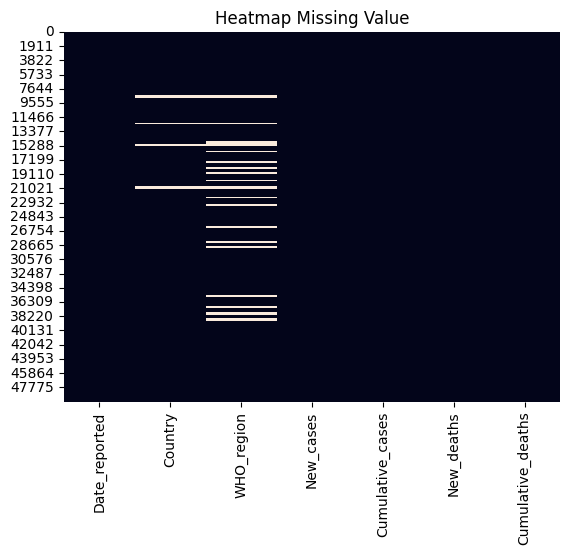

In [89]:
# Visualisasi Missing Value
sns.heatmap(data_covid.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [90]:
# Jumlah Missing Value
data_covid.isnull().sum()

Date_reported           0
Country              1242
WHO_region           4968
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

In [91]:
# Persentase Missing Value
(data_covid.isnull().sum()/len(data_covid)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
Date_reported,0.0
Country,2.5
WHO_region,10.0
New_cases,0.0
Cumulative_cases,0.0
New_deaths,0.0
Cumulative_deaths,0.0


In [92]:
# Menghapus Missing Value dengan Deleting
data_covid.dropna(inplace=True)

In [93]:
# Mengecek kembali jumlah Missing Value
data_covid.isnull().sum()

Date_reported        0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [94]:
data_covid.shape

(44712, 7)

Setelah proses ini, sudah tidak ada lagi data yang hilang. Dengan demikian, ukuran data yang tersisa terdiri dari 44712 baris dan 7 kolom.

### Menghapus duplikat data
##### (Langkah ini dilakukan untuk menghapus duplikasi pada data)

In [95]:
# Mengecek data yang duplikat
data_covid[data_covid.duplicated() == True]

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths


In [96]:
# Mengecek jumlah data yang duplikat
data_covid.duplicated().sum()

0

Dari output di atas tidak terdapat data yang duplikat. Dengan demikian, tidak perlu melakukan penghapusan data.

### Mengoreksi tipe data variabel
##### (Langkah ini dilakukan untuk mengetahui tipe data pada setiap variabel dan mengoreksi tipe data yang kurang tepat)

In [97]:
data_covid.dtypes

Date_reported        object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

In [98]:
data_covid = data_covid.astype({'Country': 'category', 'WHO_region': 'category'})
data_covid['Date_reported']=pd.to_datetime(data_covid['Date_reported'])

<ipython-input-98-7aff5cb9cdb0>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [99]:
data_covid.dtypes

Date_reported        datetime64[ns]
Country                    category
WHO_region                 category
New_cases                     int64
Cumulative_cases              int64
New_deaths                    int64
Cumulative_deaths             int64
dtype: object

Hasilnya, tipe data dari tiap variabel sudah sesuai dengan yang seharusnya.

### Mengecek Noise
##### (Langkah ini dilakukan untuk mengetahui apakah ada kesalahan pada data)

In [100]:
# Mengecek noise dari variabel kategorik
data_covid["WHO_region"].value_counts()

EURO     11385
AFRO      9729
AMRO      9729
WPRO      7038
EMRO      4554
SEARO     2277
Name: WHO_region, dtype: int64

Dari output di atas, tidak ditemukan noise berupa kesalahan penulisan.

In [101]:
# Mengecek noise dari variabel kategorik
Counter(data_covid["Country"])

Counter({'Afghanistan': 207,
         'Albania': 207,
         'Algeria': 207,
         'American Samoa': 207,
         'Andorra': 207,
         'Angola': 207,
         'Anguilla': 207,
         'Antigua and Barbuda': 207,
         'Argentina': 207,
         'Armenia': 207,
         'Aruba': 207,
         'Australia': 207,
         'Austria': 207,
         'Azerbaijan': 207,
         'Bahamas': 207,
         'Bahrain': 207,
         'Bangladesh': 207,
         'Barbados': 207,
         'Belarus': 207,
         'Belgium': 207,
         'Belize': 207,
         'Benin': 207,
         'Bermuda': 207,
         'Bhutan': 207,
         'Bolivia (Plurinational State of)': 207,
         'Bonaire, Saint Eustatius and Saba': 207,
         'Bosnia and Herzegovina': 207,
         'Botswana': 207,
         'Brazil': 207,
         'British Virgin Islands': 207,
         'Brunei Darussalam': 207,
         'Bulgaria': 207,
         'Burkina Faso': 207,
         'Burundi': 207,
         'Cabo Verde': 20

Dari output di atas, tidak ditemukan noise berupa kesalahan penulisan.

In [102]:
# Melihat ringkasan statistik dari variabel kontinu
data_covid.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,4.471200e+04,4.471200e+04,44712.000000,4.471200e+04
mean,1.725550e+04,1.726643e+06,156.208512,2.051695e+04
std,2.530765e+05,7.401249e+06,918.158293,8.113219e+04
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,1.000000e+00,5.242000e+03,0.000000,3.900000e+01
50%,1.390000e+02,5.399950e+04,1.000000,7.060000e+02
75%,2.581250e+03,5.690990e+05,26.000000,7.625000e+03
max,4.047548e+07,1.034368e+08,47687.000000,1.144877e+06


Dari output di atas, kami tidak dapat menemukan noise.

### Mengecek Outliers
##### (Langkah ini dilakukan untuk mengetahui apakah ada outlier pada data)

<Axes: xlabel='New_cases'>

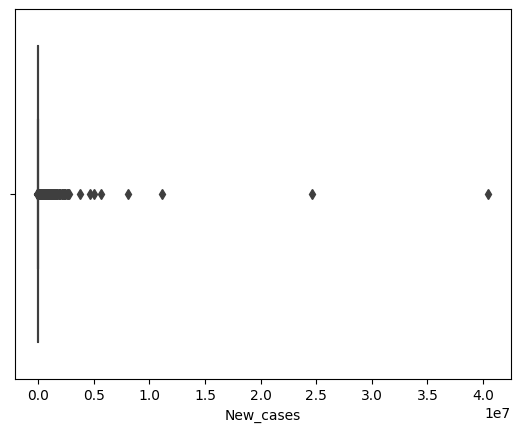

In [103]:
# Melihat distribusi dari variabel 'New_cases' menggunakan boxplot untuk mendeteksi keberadaan outlier
sns.boxplot(x="New_cases", data=data_covid)

<Axes: xlabel='Cumulative_cases'>

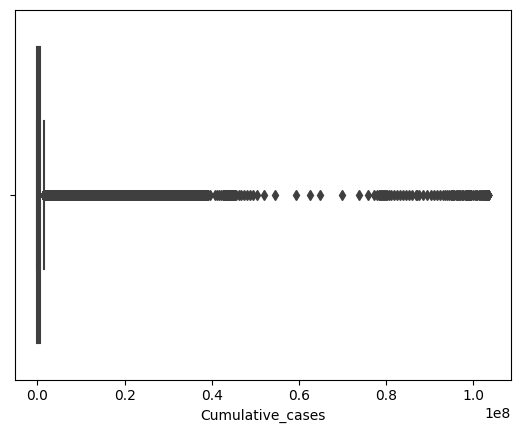

In [104]:
# Melihat distribusi dari variabel 'Cumulative_cases' menggunakan boxplot untuk mendeteksi keberadaan outlier
sns.boxplot(x="Cumulative_cases", data=data_covid)

<Axes: xlabel='New_deaths'>

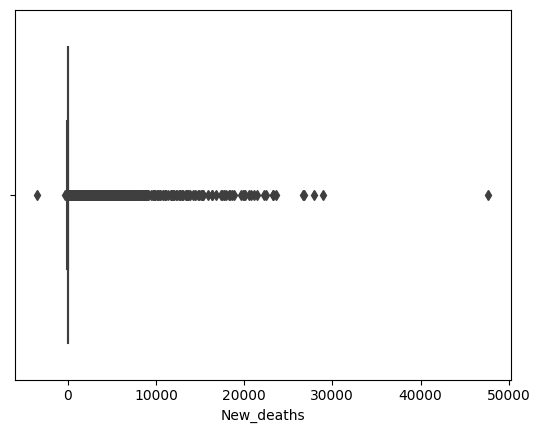

In [105]:
# Melihat distribusi dari variabel 'New_deaths' menggunakan boxplot untuk mendeteksi keberadaan outlier
sns.boxplot(x="New_deaths", data=data_covid)

<Axes: xlabel='Cumulative_deaths'>

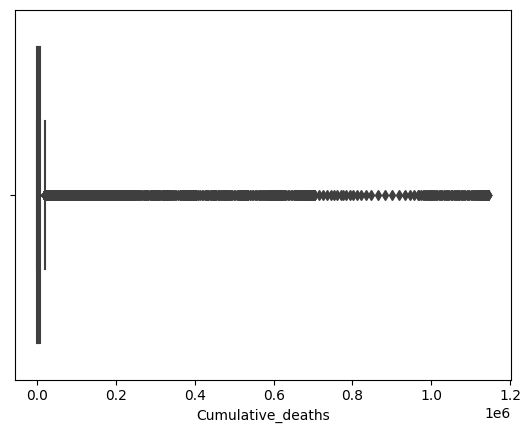

In [106]:
# Melihat distribusi dari variabel 'Cumulative_deaths' menggunakan boxplot untuk mendeteksi keberadaan outlier
sns.boxplot(x="Cumulative_deaths", data=data_covid)

Dari hasil di atas, dapat dilihat bahwa terdapat outlier pada keempat variabel tersebut. Namun, kami tidak membuang outlier karena data outlier dibutuhkan pada pengolahan data selanjutnya.

### Save data setelah pre-processing data
##### (Langkah ini dilakukan untuk menyimpan data yang telah melewati pre-processing data)

In [107]:
data_covid.to_csv('preprocessed data covid.csv', index=False)

In [108]:
data3= "preprocessed data covid.csv"
data_covid_pp = pd.read_csv(data3)

Hasilnya, data yang telah melewati pre-processing akan tersimpan dalam bentuk .csv

## Pre-processing Data Vaksinasi

### Menghapus variabel yang tidak diperlukan
##### (Langkah ini dilakukan untuk menghapus variabel yang tidak diperlukan dalam pengolahan data)  

In [109]:
data_vaksinasi.drop(["ISO3","DATA_SOURCE","VACCINES_USED","NUMBER_VACCINES_TYPES_USED", "TOTAL_VACCINATIONS_PER100","Unnamed: 16"], axis=1,inplace=True)

data_vaksinasi.shape
data_vaksinasi.transpose()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
COUNTRY,Bhutan,Namibia,Iran (Islamic Republic of),Kenya,Greenland,Comoros,Mozambique,Viet Nam,India,Bulgaria,...,Wallis and Futuna,Afghanistan,Niue,Japan,Spain,Guinea-Bissau,Liechtenstein,Côte d'Ivoire,Equatorial Guinea,Egypt
WHO_REGION,SEARO,AFRO,EMRO,AFRO,EURO,AFRO,AFRO,WPRO,SEARO,EURO,...,WPRO,EMRO,WPRO,WPRO,EURO,AFRO,NaN,AFRO,AFRO,EMRO
DATE_UPDATED,30/10/2022,12/11/2023,26/11/2023,02/04/2023,NaN,02/10/2022,02/07/2023,30/06/2023,23/11/2023,24/09/2023,...,23/01/2023,26/11/2023,04/03/2023,03/10/2023,03/09/2023,15/10/2023,NaN,19/02/2023,24/07/2022,21/05/2023
TOTAL_VACCINATIONS,2011426,1005937,1.55E+08,2.38E+07,NaN,835021,3.50E+07,2.66E+08,2.21E+09,4618931,...,17303,2.26E+07,4923,4.10E+08,1.13E+08,920752,71104,2.53E+07,488738,1.13E+08
PERSONS_VACCINATED_1PLUS_DOSE,699116.0,629767.0,65200000.0,14500000.0,NaN,438825.0,22900000.0,90500000.0,1030000000.0,2108544.0,...,7150.0,18900000.0,1638.0,105000000.0,41300000.0,747057.0,26681.0,13600000.0,270109.0,56900000.0
PERSONS_VACCINATED_1PLUS_DOSE_PER100,91.0,25.0,78.0,27.0,NaN,50.0,73.0,93.0,74.0,30.0,...,64.0,49.0,100.0,83.0,87.0,38.0,NaN,51.0,19.0,56.0
PERSONS_LAST_DOSE,677669.0,550978.0,58600000.0,11100000.0,NaN,397080.0,21300000.0,86000000.0,952000000.0,2080324.0,...,6803.0,18100000.0,1635.0,103000000.0,37500000.0,547637.0,26346.0,12200000.0,214032.0,42300000.0
PERSONS_LAST_DOSE_PER100,88.0,22.0,70.0,21.0,NaN,46.0,68.0,88.0,69.0,30.0,...,60.0,47.0,100.0,82.0,79.0,28.0,NaN,46.0,15.0,41.0
FIRST_VACCINE_DATE,27/03/2021,19/03/2021,09/02/2021,05/03/2021,NaN,10/04/2021,08/03/2021,08/03/2021,16/01/2021,30/12/2020,...,19/03/2021,22/02/2021,08/06/2021,17/02/2021,30/12/2020,02/04/2021,NaN,01/03/2021,12/02/2021,24/01/2021
PERSONS_BOOSTER_ADD_DOSE,634641.0,298560.0,31400000.0,2000636.0,NaN,NaN,2323562.0,58000000.0,229000000.0,833135.0,...,3350.0,2626670.0,1225.0,86600000.0,26600000.0,76359.0,18310.0,3138712.0,4597.0,15200000.0


Setelah proses penghapusan variabel, ukuran variabel yang tersisa adalah sebanyak 11 variabel.

### Menangani missing values
##### (Langkah ini dilakukan untuk mengetahui apakah ada missing value pada data. Jika ada, akan dilakukan deletion atau imputasi untuk menghilangkan missing value tersebut)

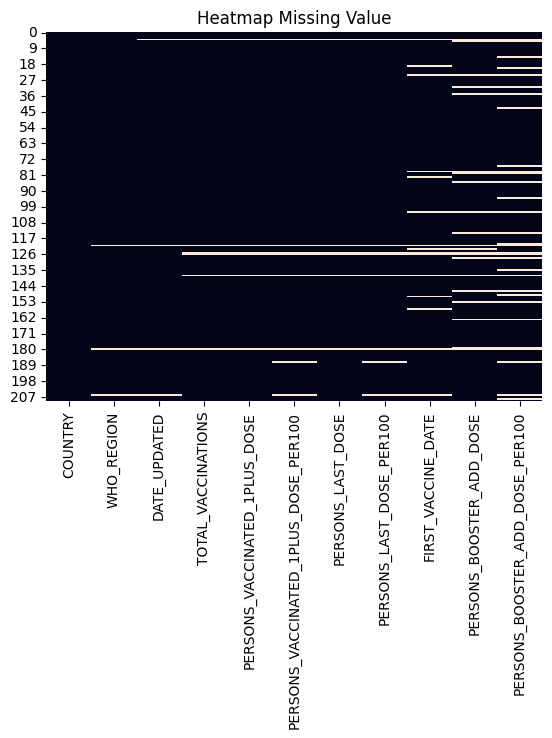

In [110]:
# Visualisasi Missing Value
sns.heatmap(data_vaksinasi.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [111]:
# Jumlah Missing Value
data_vaksinasi.isnull().sum()

COUNTRY                                  0
WHO_REGION                               3
DATE_UPDATED                             4
TOTAL_VACCINATIONS                       6
PERSONS_VACCINATED_1PLUS_DOSE            6
PERSONS_VACCINATED_1PLUS_DOSE_PER100     8
PERSONS_LAST_DOSE                        6
PERSONS_LAST_DOSE_PER100                 8
FIRST_VACCINE_DATE                      15
PERSONS_BOOSTER_ADD_DOSE                21
PERSONS_BOOSTER_ADD_DOSE_PER100         31
dtype: int64

In [112]:
# Menghapus Missing Value dengan Deleting
data_vaksinasi.dropna(inplace=True)

In [113]:
data_vaksinasi.isnull().sum()

COUNTRY                                 0
WHO_REGION                              0
DATE_UPDATED                            0
TOTAL_VACCINATIONS                      0
PERSONS_VACCINATED_1PLUS_DOSE           0
PERSONS_VACCINATED_1PLUS_DOSE_PER100    0
PERSONS_LAST_DOSE                       0
PERSONS_LAST_DOSE_PER100                0
FIRST_VACCINE_DATE                      0
PERSONS_BOOSTER_ADD_DOSE                0
PERSONS_BOOSTER_ADD_DOSE_PER100         0
dtype: int64

In [114]:
data_vaksinasi.shape

(174, 11)

Setelah proses ini, sudah tidak ada lagi data yang hilang. Dengan demikian, ukuran data yang tersisa terdiri dari 174 baris dan 11 kolom.

### Menghapus duplikat data
##### (Langkah ini dilakukan untuk menghapus duplikasi pada data)

In [115]:
print(data_vaksinasi.shape)
print("Jumlah data yang duplikat", data_vaksinasi.duplicated().sum())

(174, 11)
Jumlah data yang duplikat 0


Dari output di atas tidak terdapat data yang duplikat. Dengan demikian, tidak perlu melakukan penghapusan data.

### Mengoreksi tipe data variabel
##### (Langkah ini dilakukan untuk mengetahui tipe data pada setiap variabel dan mengoreksi tipe data yang kurang tepat)

In [116]:
data_vaksinasi = data_vaksinasi.astype({'WHO_REGION': 'category', 'TOTAL_VACCINATIONS': 'float64'})
data_vaksinasi["DATE_UPDATED"] = pd.to_datetime(data_vaksinasi["DATE_UPDATED"])
data_vaksinasi["FIRST_VACCINE_DATE"] = pd.to_datetime(data_vaksinasi["FIRST_VACCINE_DATE"])

<ipython-input-116-5fb65e40c8cb>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

<ipython-input-116-5fb65e40c8cb>:3: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [117]:
data_vaksinasi.dtypes

COUNTRY                                         object
WHO_REGION                                    category
DATE_UPDATED                            datetime64[ns]
TOTAL_VACCINATIONS                             float64
PERSONS_VACCINATED_1PLUS_DOSE                  float64
PERSONS_VACCINATED_1PLUS_DOSE_PER100           float64
PERSONS_LAST_DOSE                              float64
PERSONS_LAST_DOSE_PER100                       float64
FIRST_VACCINE_DATE                      datetime64[ns]
PERSONS_BOOSTER_ADD_DOSE                       float64
PERSONS_BOOSTER_ADD_DOSE_PER100                float64
dtype: object

Hasilnya, tipe data dari tiap variabel sudah sesuai dengan yang seharusnya.

### Mengecek Noise
##### (Langkah ini dilakukan untuk mengetahui apakah ada kesalahan pada data)

In [118]:
Counter(data_vaksinasi["COUNTRY"])

Counter({'Bhutan': 1,
         'Namibia': 1,
         'Iran (Islamic Republic of)': 1,
         'Kenya': 1,
         'Mozambique': 1,
         'Viet Nam': 1,
         'India': 1,
         'Bulgaria': 1,
         'Malaysia': 1,
         'Venezuela (Bolivarian Republic of)': 1,
         'Bahamas': 1,
         'Georgia': 1,
         'Maldives': 1,
         'Ecuador': 1,
         'Kyrgyzstan': 1,
         'Tuvalu': 1,
         'Sweden': 1,
         'Rwanda': 1,
         'Malawi': 1,
         'Luxembourg': 1,
         'South Africa': 1,
         'Norway': 1,
         'Nauru': 1,
         'Finland': 1,
         'North Macedonia': 1,
         'Honduras': 1,
         'Suriname': 1,
         'Saint Kitts and Nevis': 1,
         'Denmark': 1,
         'Pakistan': 1,
         'Anguilla': 1,
         'Grenada': 1,
         'Sri Lanka': 1,
         'Sierra Leone': 1,
         'Vanuatu': 1,
         'Antigua and Barbuda': 1,
         'Australia': 1,
         'Singapore': 1,
         'Botswana': 1,
 

Dari output di atas tidak ada noise berupa kesalahan penulisan.

In [119]:
data_vaksinasi["WHO_REGION"].value_counts()

EURO     48
AMRO     40
AFRO     33
WPRO     28
EMRO     15
SEARO    10
Name: WHO_REGION, dtype: int64

Dari output di atas tidak ada noise berupa kesalahan penulisan.

In [120]:
data_vaksinasi.describe()

,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
count,1.740000e+02,1.740000e+02,174.000000,1.740000e+02,174.000000,1.740000e+02,174.000000
mean,7.425530e+07,3.037376e+07,65.965517,2.796190e+07,60.770115,1.407723e+07,32.264368
std,3.240964e+08,1.301929e+08,21.588076,1.234802e+08,22.076169,6.724795e+07,23.275162
min,4.619000e+03,1.638000e+03,10.000000,1.635000e+03,9.000000,5.630000e+02,1.000000
25%,1.304310e+06,6.396328e+05,49.250000,5.412988e+05,43.250000,1.677635e+05,9.250000
50%,9.518414e+06,4.331162e+06,70.000000,4.184766e+06,64.500000,1.130274e+06,31.000000
75%,2.880000e+07,1.510000e+07,83.750000,1.310000e+07,79.000000,5.676290e+06,54.000000
max,3.520000e+09,1.320000e+09,100.000000,1.280000e+09,100.000000,8.340000e+08,83.000000


Dari output di atas, kami tidak dapat menemukan noise.

### Mengecek Outliers
##### (Langkah ini dilakukan untuk mengetahui apakah ada outlier pada data)

<Axes: xlabel='TOTAL_VACCINATIONS'>

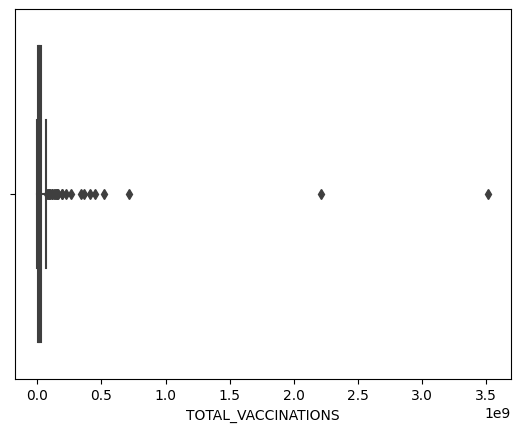

In [121]:
sns.boxplot(x="TOTAL_VACCINATIONS", data=data_vaksinasi)

<Axes: xlabel='PERSONS_VACCINATED_1PLUS_DOSE'>

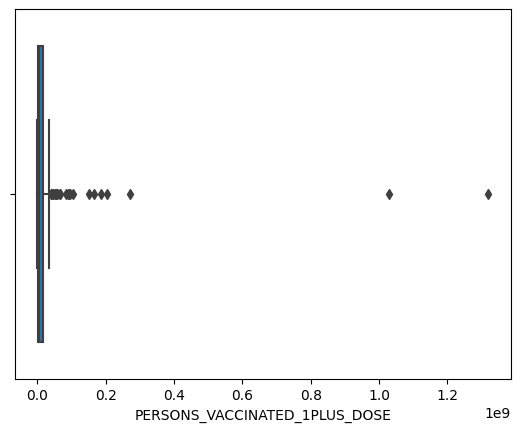

In [122]:
sns.boxplot(x="PERSONS_VACCINATED_1PLUS_DOSE", data=data_vaksinasi)

<Axes: xlabel='PERSONS_LAST_DOSE'>

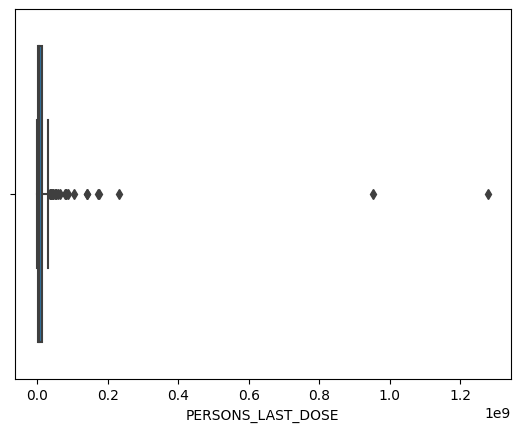

In [123]:
sns.boxplot(x="PERSONS_LAST_DOSE", data=data_vaksinasi)

<Axes: xlabel='PERSONS_BOOSTER_ADD_DOSE'>

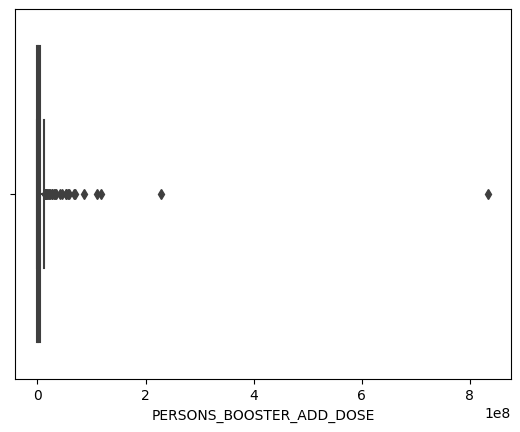

In [124]:
sns.boxplot(x="PERSONS_BOOSTER_ADD_DOSE", data=data_vaksinasi)


Dari hasil di atas, dapat dilihat bahwa terdapat outlier pada variabel-variabel tersebut. Namun, kami tidak membuang outlier karena data outlier dibutuhkan pada pengolahan data selanjutnya.

### Save data setelah pre-processing data
##### (Langkah ini dilakukan untuk menyimpan data yang telah melewati pre-processing data)

In [125]:
data_vaksinasi.to_csv('preprocessed data vaksinasi.csv', index=False)

In [126]:
data4= "preprocessed data vaksinasi.csv"
data_vaksinasi_pp = pd.read_csv(data4)

# PENGOLAHAN DAN VISUALISASI DATA

## Distribusi Kasus COVID-19 di Seluruh Dunia

> Visualisasi data menggunakan map plot untuk menganalisis distribusi kasus COVID-19 di seluruh dunia. Metode ini dipilih karena dapat membantu visualisasi data geografis dan menunjukkan persebaran data di map. Sehingga kita dapat mengidentifikasi wilayah dengan kasus tinggi berdasarkan warna.

> Dari hasil visualisasi, negara USA dan China memiliki warna merah pekat yang menandakan jumlah kasus dari negara-negara tersebut sangat tinggi hingga mencapai 100 juta kasus.



In [127]:
# Mengambil Date_reported terakhir dari data
dataakhir_covid =data_covid_pp[data_covid_pp['Date_reported'] == '2023-12-17']

# Visualisasi distribusi kasus COVID-19 di seluruh negara
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(dataakhir_covid, left_on='name', right_on='Country')

fig = px.choropleth(merged,
                    locations='name',
                    locationmode='country names',
                    color='Cumulative_cases',
                    hover_name='Country',
                    color_continuous_scale='OrRd',
                    title='Distribusi Kumulatif Kasus COVID-19 di Seluruh Negara')

# Tampilkan hasilnya
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgray")
fig.show()

<ipython-input-127-bd37a81bc92b>:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



## Tren Harian Jumlah Kasus COVID-19 berdasarkan Negara

> Visualisasi data menggunakan time series plot untuk menganalisis tren harian kasus COVID-19 berdasarkan negara. Metode ini dipilih karena time series plot memungkinkan kita untuk mengidentifikasi pola harian dalam data kasus COVID-19. Sehingga, kita dapat mengidentifikasi tren harian dalam kasus COVID-19, seperti lonjakan kasus pada hari-hari tertentu yang mungkin terkait dengan aktivitas sosial atau kebijakan tertentu.


> Dari hasil visualisasi di bulan Januari 2023, terdapat negara yang mengalami lonjakan kasus yang sangat pesat bahkan mencapai 40.000 kasus dalam sehari. Dari sini kita dapat mengidentifikasi lebih lanjut terkait penyebab dari lonjakan kasus di negara tersebut.

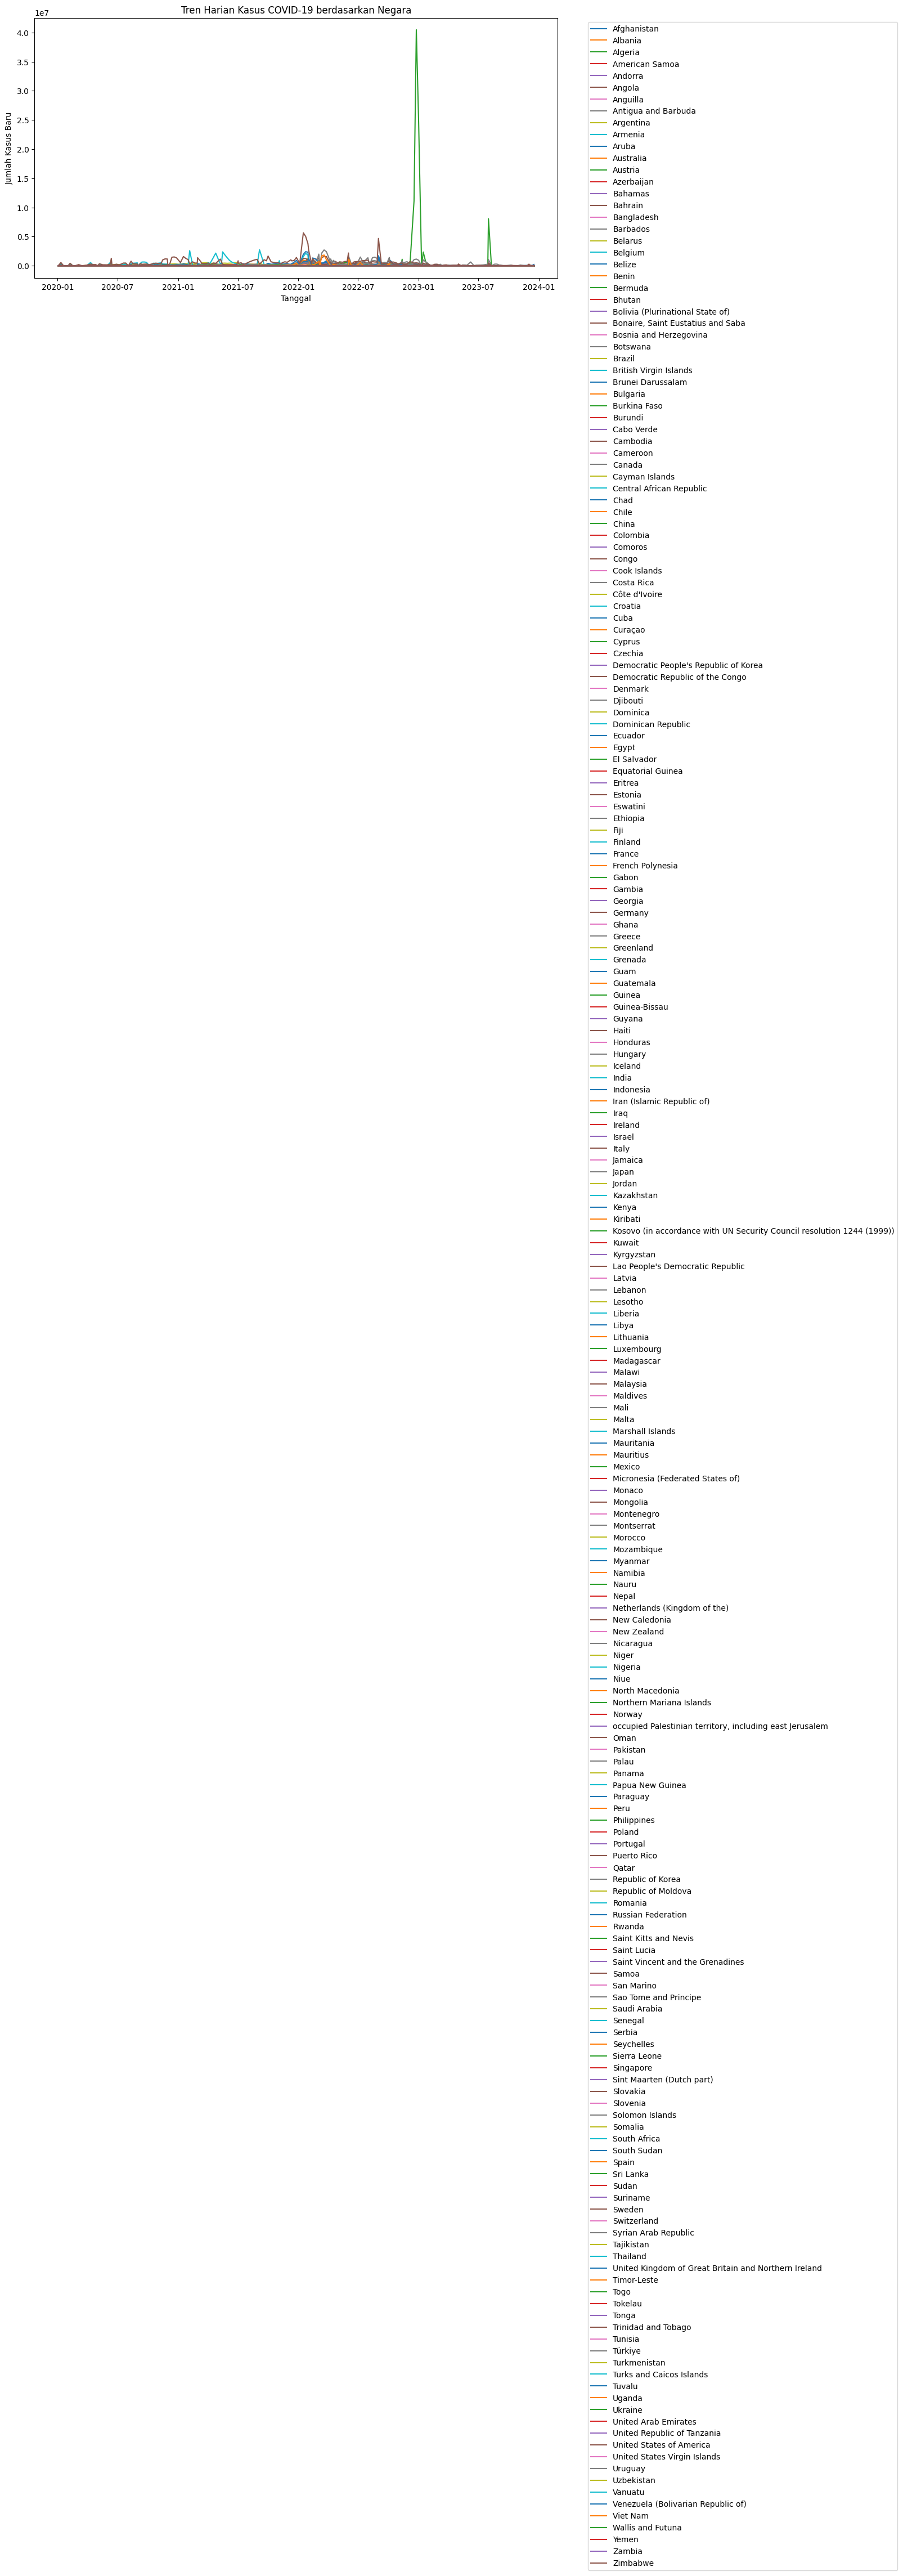

In [134]:
# Plot tren harian kasus COVID-19 berdasarkan negara
plt.figure(figsize=(12, 6))
for country in data_covid['Country'].unique():
    country_data = data_covid[data_covid['Country'] == country]
    sns.lineplot(data=country_data['New_cases'], label=country)

plt.title('Tren Harian Kasus COVID-19 berdasarkan Negara')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kasus Baru')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Analisis Efektivitas Vaksinasi
> Visualisasi data menggunakan time series plot untuk menganalisis efektivitas vaksinasi. Metode ini dipilih karena dengan menggunakan time series plot, kita dapat membandingkan tren kasus COVID-19 dan total vaksinasi berdasarkan waktu untuk mengetahui efektivitas vaksinasi.


> Dari hasil visualisasi, terlihat bahwa jumlah vaksinasi meningkat pesat pada kuartal kedua tahun 2023 diikuti dengan penurunan kasus COVID-19 pada tanggal yang sama. Walaupun kasus COVID-19 sempat naik kembali pada bulan Agustus 2023, namun setelahnya kasus COVID-19 kembali menurun. Hal ini berarti pemberian vaksin efektif untuk mengurangi kasus COVID-19.

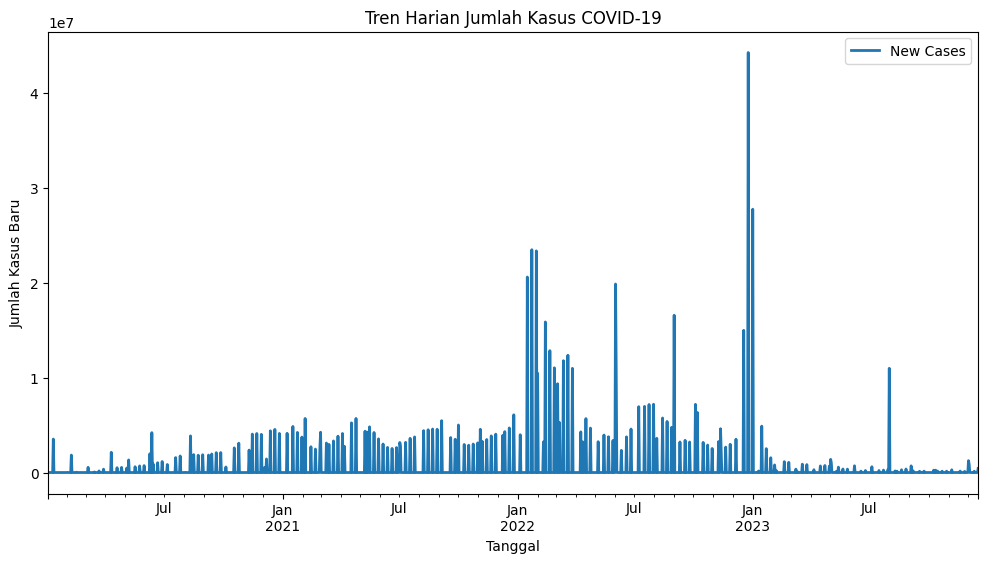

In [129]:
# Mengubah variabel Date_reported menjadi index
data_covid.set_index('Date_reported', inplace=True)

# Plot tren harian jumlah kasus COVID-19
plt.figure(figsize=(12, 6))
data_covid['New_cases'].resample('D').sum().plot(label='New Cases', linewidth=2)
plt.title('Tren Harian Jumlah Kasus COVID-19')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kasus Baru')
plt.legend()
plt.show()

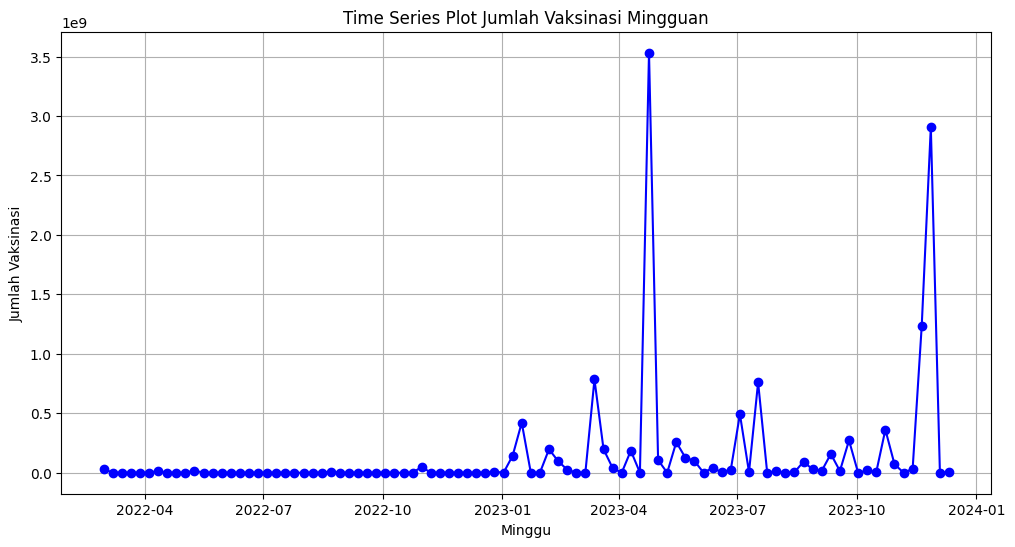

In [130]:
# Menyusun data berdasarkan minggu dan menghitung total vaksinasi per minggu
weekly_vaccinations = data_vaksinasi.resample('W-Mon', on='DATE_UPDATED')['TOTAL_VACCINATIONS'].sum()

# Membuat time series plot mingguan
plt.figure(figsize=(12, 6))
plt.plot(weekly_vaccinations.index, weekly_vaccinations.values, marker='o', linestyle='-', color='b')
plt.title('Time Series Plot Jumlah Vaksinasi Mingguan')
plt.xlabel('Minggu')
plt.ylabel('Jumlah Vaksinasi')
plt.grid(True)
plt.show()

## Analisis 20 Negara dengan Jumlah Kasus COVID-19 Terbanyak
> Visualisasi data menggunakan bar plot untuk menganalisis 20 negara dengan jumlah kasus COVID-19 terbanyak. Metode ini dipilih karena bar plot mudah dipahami dan memberikan gambaran yang jelas tentang jumlah kasus COVID-19 di berbagai negara.


> Dari hasil visualisasi, USA menempati tempat pertama dengan jumlah kasus COVID-19 terbanyak.






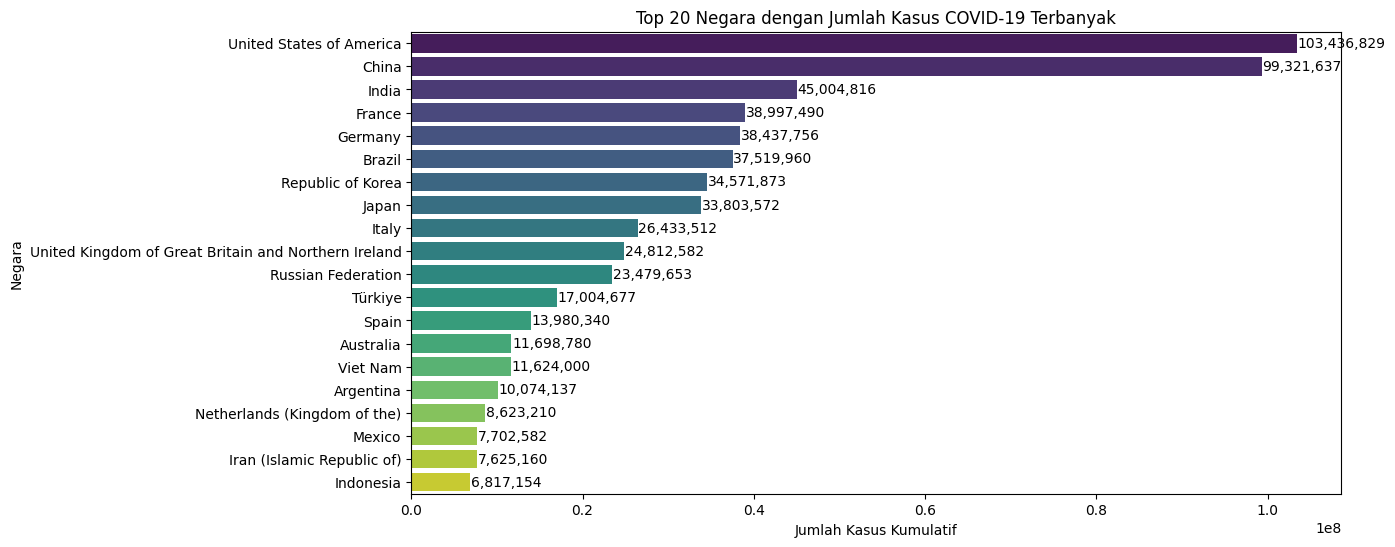

In [131]:
# Mengelompokkan data berdasarkan negara dan menghitung total kasus
top_countries = data_covid_pp.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False).head(20)

# Plot Bar
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 20 Negara dengan Jumlah Kasus COVID-19 Terbanyak')
plt.xlabel('Jumlah Kasus Kumulatif')
plt.ylabel('Negara')

# Menambahkan label total jumlah di samping plot bar
for index, value in enumerate(top_countries.values):
    plt.text(value + 100000, index, f'{value:,}', va='center', fontsize=10)

plt.show()

## Analisis Kasus COVID-19 dan Total Vaksinasi pada 20 Negara dengan Kasus COVID-19 Terbanyak

> Visualisasi data menggunakan bar plot untuk menganalisis kasus COVID-19 dan total vaksinasi pada 20 negara dengan jumlah kasus COVID-19 terbanyak. Metode ini dipilih karena bar plot memungkinkan kita untuk membandingkan jumlah kasus COVID-19 dan total vaksinasi pada 20 negara dengan jumlah kasus terbanyak

> Dari hasil visualisasi, USA memiliki jumlah kasus COVID-19 terbanyak, namun total vaksinasi masih rendah, hanya sekitar 20% dari jumlah kasus COVID-19.

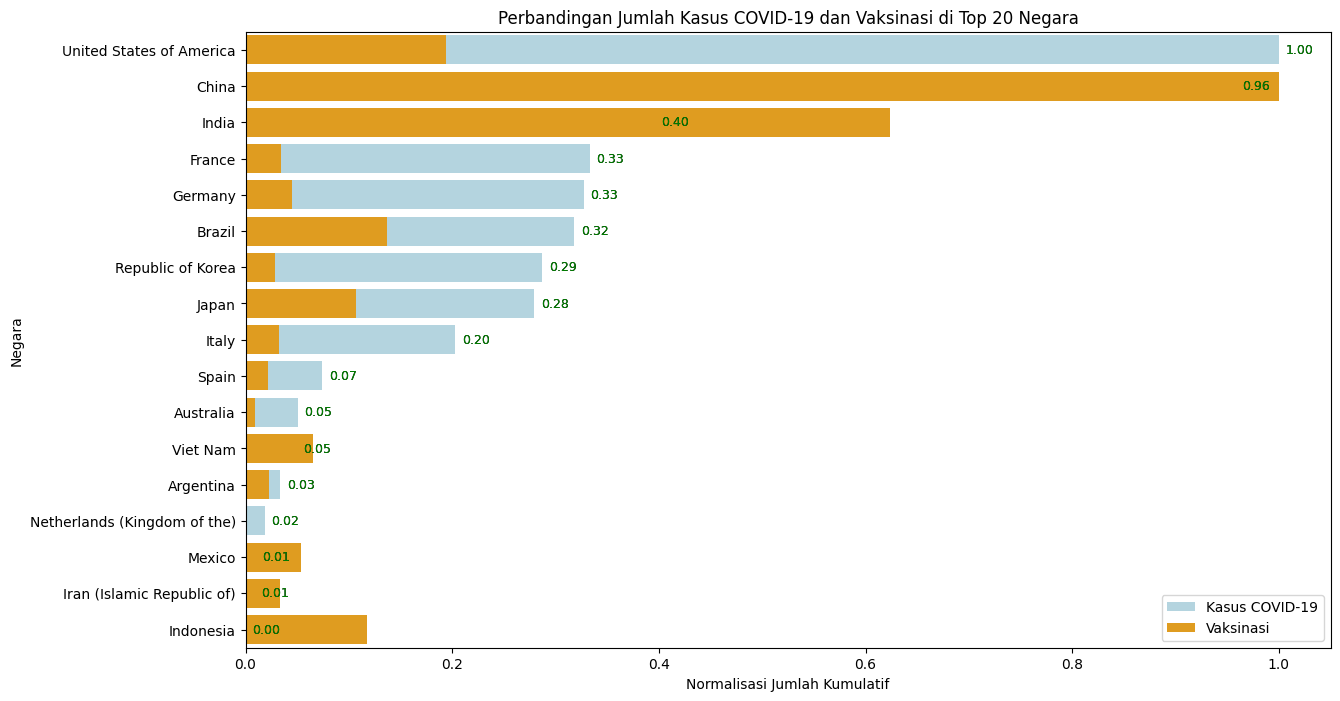

In [132]:
# Mengubah nama variabel 'Country' menjadi 'COUNTRY'
data_covid_pp.rename(columns={'Country': 'COUNTRY'}, inplace=True)

# Mengelompokkan data COVID-19 berdasarkan negara dan menghitung total kasus
top_countries_covid = data_covid_pp.groupby('COUNTRY')['Cumulative_cases'].max().sort_values(ascending=False).head(20)

# Mengelompokkan data vaksinasi berdasarkan negara dan menghitung total vaksinasi
top_countries_vaksinasi = data_vaksinasi_pp.groupby('COUNTRY')['TOTAL_VACCINATIONS'].max().sort_values(ascending=False)

# Menggabungkan data COVID-19 dan vaksinasi
merged_data = pd.merge(top_countries_covid, top_countries_vaksinasi, on='COUNTRY', how='inner')

# Normalisasi data untuk perbandingan yang lebih mudah
merged_data_normalized = (merged_data - merged_data.min()) / (merged_data.max() - merged_data.min())


# Plot Bar
plt.figure(figsize=(14, 8))
bar1 = sns.barplot(x=merged_data_normalized['Cumulative_cases'], y=merged_data_normalized.index, color='lightblue', label='Kasus COVID-19')
bar2 = sns.barplot(x=merged_data_normalized['TOTAL_VACCINATIONS'], y=merged_data_normalized.index, color='orange', label='Vaksinasi')

# Anotasi untuk setiap batang
for p1, p2, country in zip(bar1.patches, bar2.patches, merged_data_normalized.index):
    plt.text(p1.get_width() + 0.02, p1.get_y() + p1.get_height() / 2, f'{p1.get_width():.2f}', ha='center', va='center', fontsize=9, color='black')
    plt.text(p2.get_width() + 0.02, p2.get_y() + p2.get_height() / 2, f'{p2.get_width():.2f}', ha='center', va='center', fontsize=9, color='green')

plt.title('Perbandingan Jumlah Kasus COVID-19 dan Vaksinasi di Top 20 Negara')
plt.xlabel('Normalisasi Jumlah Kumulatif')
plt.ylabel('Negara')
plt.legend()
plt.show()

## Analisis Tren Kumulatif Kasus dan Kematian COVID-19
> Visualisasi data menggunakan line plot untuk menganalisis tren kumulatif kasus dan kematian COVID-19. Metode ini dipilih karena line plot memungkinkan kita untuk melihat perubahan jumlah kasus dan kematian COVID-19 dari waktu ke waktu, sehingga kita dapat mengidentifikasi tren dan pola dalam data tersebut.

> Dari hasil visualisasi terlihat bahwa kumulatif kasus COVID-19 dan kematian akibat COVID-19 bergerak secara berhubungan. Saat kumulatif kasus COVID-19 naik, kematian akibat COVID-19 juga cenderung naik, begitupun sebaliknya.

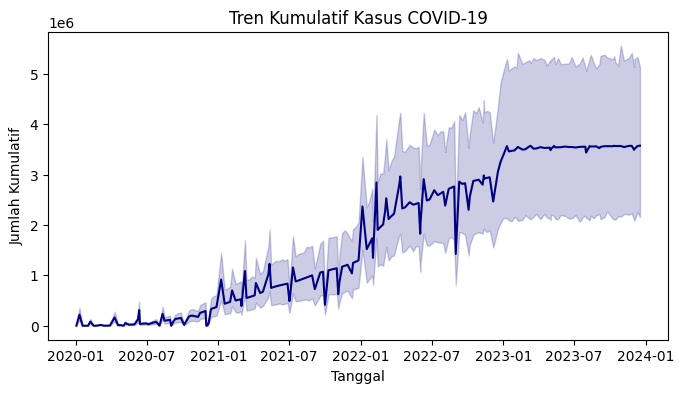

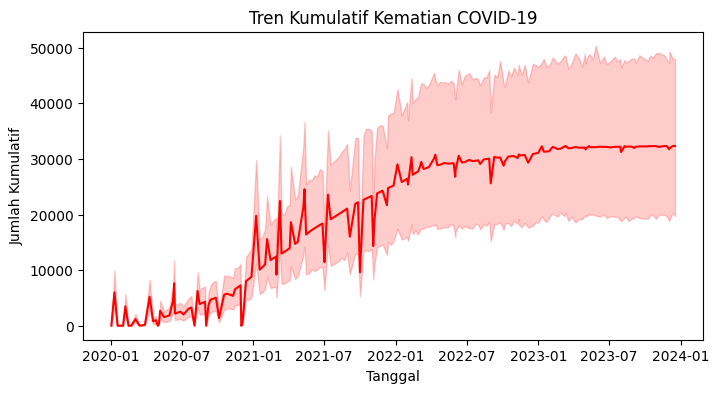

In [133]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='Date_reported', y='Cumulative_cases', data=data_covid, color='navy')
plt.title('Tren Kumulatif Kasus COVID-19')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kumulatif')
plt.show()

plt.figure(figsize=(8, 4))
sns.lineplot(x='Date_reported', y='Cumulative_deaths', data=data_covid, color='red')
plt.title('Tren Kumulatif Kematian COVID-19')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kumulatif')
plt.show()

## Kesinambungan Antar Hasil yang Diperoleh

**Distribusi Kasus COVID-19 di Seluruh Dunia dan Tren Harian Jumlah Kasus COVID-19 berdasarkan Negara**
*   Dua visualisasi ini menggambarkan bahwa kasus COVID-19 telah menyebar ke seluruh dunia dan telah terjadi lonjakan kasus di berbagai negara.

**Analisis Efektivitas Vaksinasi, Analisis Kasus COVID-19 dan Total Vaksinasi pada 20 Negara dengan Kasus COVID-19 Terbanyak**
*   Visualisasi ini menunjukkan bahwa vaksinasi efektif dalam mengurangi kasus COVID-19, terlihat bahwa jumlah vaksinasi meningkat pesat pada kuartal kedua tahun 2023 diikuti dengan penurunan kasus COVID-19 pada tanggal yang sama. Namun, masih terdapat beberapa negara, seperti USA, yang memiliki jumlah kasus terbanyak, namun total vaksinasi masih rendah.

**Distribusi Kasus COVID-19 di Seluruh Dunia dan Analisis Tren Kumulatif Kasus & Kematian COVID-19**
*   Dua visualisasi ini menunjukkan bahwa kumulatif kasus COVID-19 dan kematian akibat COVID-19 bergerak secara berhubungan. Saat kumulatif kasus COVID-19 naik, kematian akibat COVID-19 juga cenderung naik, begitupun sebaliknya.





## Konstruksi Cerita Utuh

Hasil Analisis COVID-19 dan Vaksinasi di Seluruh Dunia:

> Dari hasil analisis data yang telah dilakukan, dapat dilihat distribusi kasus COVID-19 di seluruh dunia melalui visualisasi map plot. Dilihat dari warna-warna yang mencerminkan kasus, USA dan China memiliki jumlah kasus yang tinggi, mencapai 100 juta kasus. Informasi ini memberikan pemahaman awal tentang pesebaran kasus COVID-19 secara global.

> Lalu, untuk lebih memahami pesebaran dinamika COVID-19, dapat dilihat tren harian jumlah kasus COVID-19 bedasarkan negara menggunakan time plot. Pada bulan Januari 2023, terlihat adanya lonjakan kasus yang signifikan, mencapai 40.000 kasus dalam sehari di beberapa negara.

> Namun, seiring berjalannya waktu, jumlah kasus COVID-19 mulai menurun di berbagai negara. Hal ini disebabkan oleh diperlakukan kebijakan-kebijakan di seluruh negara, yaitu penerapan protokol kesehatan, peningkatan kesadaran masyarakat, dan ketersediaan vaksin.

> Vaksinasi COVID-19 terbukti efektif dalam mengurangi kasus COVID-19. Jumlah vaksinasi yang meningkat pesat pada kuartal kedua tahun 2023 diikuti dengan penurunan kasus COVID-19 pada tanggal yang sama.

> Namun, masih terdapat beberapa negara, seperti USA, yang memiliki jumlah kasus terbanyak, namun total vaksinasi masih rendah. Hal ini dapat memperlambat upaya pengendalian pandemi COVID-19.

> Terakhir, dapat dilihat analisis tren kumulatif kasus dan kematian COVID-19. Visualisasi ini menunjukkan bahwa ketika kasus naik, kematian juga cenderung naik. Dari informasi ini, dapat membantu dalam menanggapi dan mengendalikan penyebaran COVID-19.

## Informasi Bermakna

> Terdapat banyak informasi bermakna yang dihasilkan dari proses ini. Diperoleh informasi bahwa kasus COVID-19 menyebar hampir ke seluruh dunia. Berdasarkan data terakhir, USA menjadi negara dengan kasus COVID-19 terbanyak hingga mencapai 100 juta kasus. Namun total vaksinasi pada negara tersebut masih rendah, hanya sekitar 20% dari jumlah kasus COVID-19 yang terjadi di USA.


> Saat kumulatif kasus COVID-19 naik, kematian akibat COVID-19 juga cenderung naik, begitupun sebaliknya. Dari tren harian kasus COVID-19, terdapat satu negara yang mengalami lonjakan kasus yang signifikan di awal tahun 2023. Pada kuartal kedua tahun 2023 diadakan vaksinasi massal besar-besaran, sehingga kasus mulai mereda setelahnya. Hal ini berarti pemberian vaksin efektif untuk mengurangi jumlah kasus COVID-19.

# PENUTUP
> Setelah melewati beberapa tahapan pre-processing serta pengolahan dan visualisasi data, kami menyadari bahwa pre-processing data sangat penting dalam mempersiapkan data sebelum dilakukan analisis lebih lanjut. Visualisasi data juga menjadi alat yang penting dalam memahami dan menganalisis data, sehingga mempermudah pembaca dalam memperoleh informasi.


> Berdasarkan hasil visualisasi, kami mendapatkan beberapa informasi terkait tren dan distribusi kasus COVID-19 serta efektivitas vaksinasi. Diperoleh informasi bahwa kasus COVID-19 menyebar hampir ke seluruh dunia. Kami juga dapat mengetahui 20 negara dengan jumlah kasus COVID-19 terbanyak beserta tingkat vaksinasinya.  Kami juga dapat mengetahui tren harian kasus COVID-19 untuk melihat lonjakan kasus pada waktu tertentu. Kemudian berdasarkan tren jumlah kasus COVID-19 dan vaksinasi, kami bisa simpulkan bahwa pemberian vaksin efektif untuk mengurangi kasus COVID-19.


Link Google Drive : https://drive.google.com/drive/folders/1Leary1MHqFAI1TIlBQh-GYCbfG_5SpRh?usp=drive_link